In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse

# HW4

In [2]:
#Define gaussian function to be used throughout the assignment.
def Gaussian(x,μ,σ):
    return (1/ (np.sqrt(2*np.pi) * σ)) * np.exp(-np.power(x - μ, 2.) / (2 * np.power(σ, 2.)))

# Question 1:

In [3]:
#defining the shifting function
def ShiftArray(array, shift):

    dx = unit_impulse(array.size, shift) #define a delta function where δ(x-shift) = 1 at x=shift
    
    shifted_a = np.fft.ifft(np.fft.fft(array)*np.fft.fft(dx)) #convolution theorem with f=array and g=δ

    return np.real(shifted_a)

In [4]:
gauss = (Gaussian(np.arange(100), 50, 2))
shift = int(len(gauss)/2)
shifted_gauss = ShiftArray(gauss, shift)

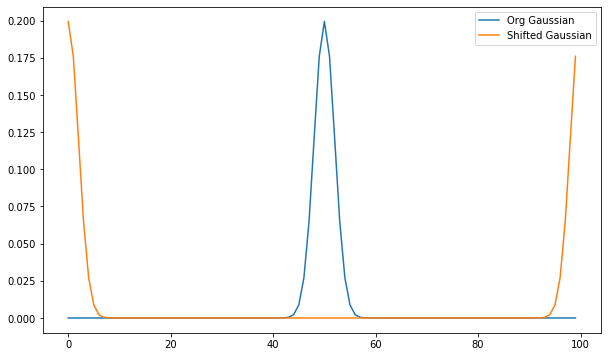

In [5]:
plt.figure(figsize=(10,6))
plt.plot(gauss, label='Org Gaussian')
plt.plot(shifted_gauss, label='Shifted Gaussian')
plt.legend()

It looks like the Gaussian has been correctly shifted by 50 (half of the length of the array).

# Question 2:

In [6]:
#defining the correlation function
def correlation(array1, array2):
    
    f = np.fft.fft(array1) #discrete fourier transform of the first array
    g = np.conjugate(np.fft.fft(array2)) # complexe conjugate of the discrete fourier transform of the second array
    
    fg = np.real(np.fft.ifft(f*g)) 
    return fg

In [7]:
gauss = (Gaussian(np.arange(100), 50, 2)) #defining our gaussian with mean 50 and std 2
corr_gauss = correlation(gauss, gauss) #getting the correlation

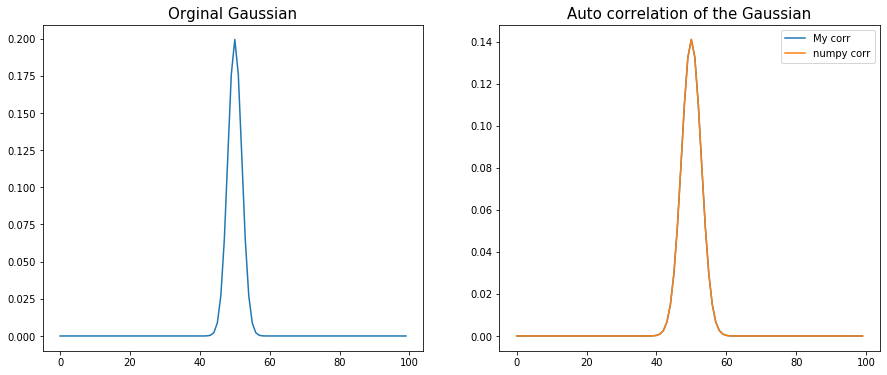

In [8]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(gauss)
plt.title('Orginal Gaussian', fontsize=15)

plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(corr_gauss), label='My corr')
plt.plot(np.correlate(gauss, gauss, "same"), label='numpy corr') #plot the correlation function of numpy to see if believable
plt.title('Auto correlation of the Gaussian', fontsize=15)
plt.legend()

The correlation from the function I wrote and the correlation from numpy overlap perfectly.

# Question 3:

In [9]:
#take the gaussian and shift it by an arbitrary amount, here we use 20:
gauss = (Gaussian(np.arange(100), 50, 5))
shifted_gauss20 = ShiftArray(gauss, 20)

In [10]:
#take the correlation of the two gaussians:
corr_2gauss = correlation(shifted_gauss20, gauss)

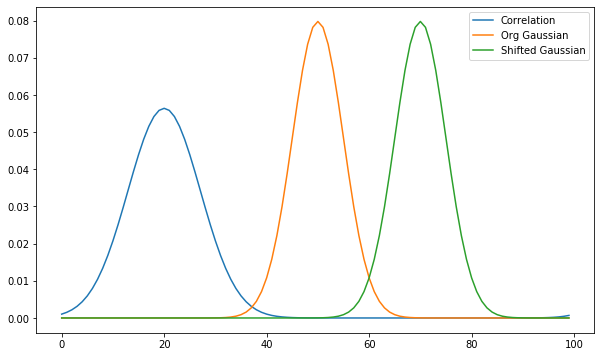

In [11]:
plt.figure(figsize=(10,6))
plt.plot(corr_2gauss, label='Correlation')
plt.plot(gauss, label= 'Org Gaussian')
plt.plot(shifted_gauss20, label='Shifted Gaussian')
plt.legend()

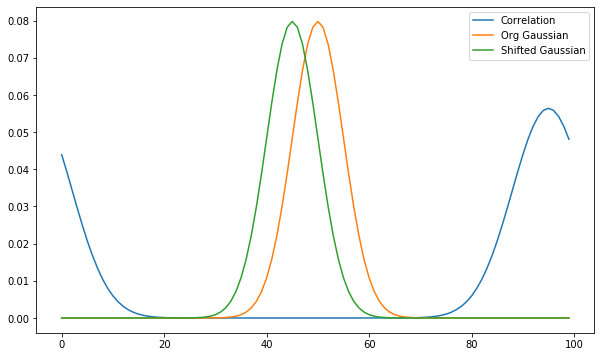

In [12]:
shifted_gauss60 = ShiftArray(gauss, -5)

plt.figure(figsize=(10,6))
plt.plot(correlation(shifted_gauss60, gauss), label='Correlation')
plt.plot(gauss, label= 'Org Gaussian')
plt.plot(shifted_gauss60, label='Shifted Gaussian')
plt.legend()

The mean of the correlated function appears to be at the value of the offset between the two gaussians. Since DFTs are periodic, that means for a shift of -5, the mean lands on 95. The amplitude also appears to depende on the offest. The closer the offset is from 0, the greater the amplitude. Inversly, when the offset gets closer to half of the array's length, the amplitude decreases. This makes sense as half of the length's array is when the two Gaussians' means are furthest from each other. 

However, it is suprising that the correlated function is not centered on where the two functions overlap. 

# Question 4:

In [13]:
def ConvNoWrap(array1, array2):
    
    #for each input arrays, add 0s the length of the array:
    a1 = np.zeros(array1.size*2)
    a2 = np.zeros(array2.size*2)
    
    for i in range(len(array1)):
        a1[i] = array1[i]
    
    for i in range(len(array2)):
        a2[i] = array2[i]
        
    conv = np.fft.ifft(np.fft.fft(a1) * np.fft.fft(a2)) #convolution theorem
    
    return np.real(conv)

Below we show a plot of the convolution of 2 Gaussians

In [14]:
g1 = (Gaussian(np.arange(100), 50, 2))
g2 = (Gaussian(np.arange(100), 30, 10))

In [15]:
conv2 = ConvNoWrap(g1, g2)

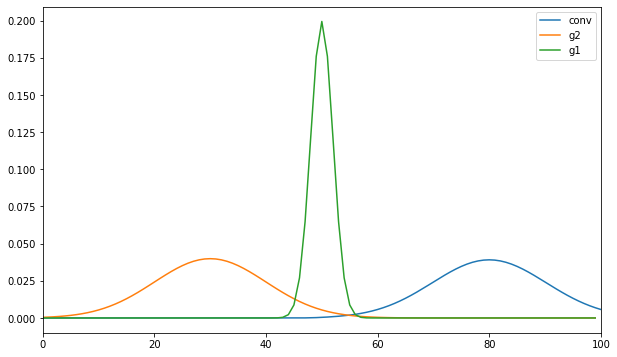

In [16]:
plt.figure(figsize=(10,6))
plt.plot(conv2, label='conv')
plt.plot(g2, label='g2')
plt.plot(g1, label='g1')
plt.xlim(0,100)
plt.legend()

# Question 5:

### a)

So we start with:
 
$$\sum_{0}^{N-1} e^{-2\pi i k x/N} = \sum_{0}^{N-1} \left(e^{-2\pi i k/N} \right)^x$$

And using the formula for geometric series:

$$\sum_{0}^{N-1} r^k = \frac{1 - r^N}{1 - r}$$

Therefore, we can rewrite the first equation as:

$$\sum_{0}^{N-1} e^{-2\pi i k x/N} = \frac{1 - e^{-2\pi i k}}{1 - e^{-2\pi i k/N}} $$

### b)

In the limit where $ k\to 0$, we can expand the exponents as:
$$e^{-2\pi k} \sim 1 - 2\pi i k $$
$$e^{-2\pi k/N} \sim 1 - 2\pi i \frac{k}{N}$$

Therefore, the equation becomes :

$$\frac{1-1+2\pi i k}{1 - 1 + 2\pi i \frac{k}{N}} = N $$

Now, looking at the equation in 5)a): the numerator of the equation is 0 for k integer. If k is not a multiple of N, then (k/N) is not an integer, and thus the denominator of the same equation is not null. Therefore, if k is not a multiple of N, the whole equation is 0.

# c)

The definition of the DFT is:

$$DFT = \sum_{0}^{N-1} x_n e^{-2\pi 1 kn/N} $$

To take the DFT of a sine funtion, we set $x_n = sin(\frac{2\pi k'n}{N})$, then the equation becomes:

$$DFT = \sum_{0}^{N-1} sin\left(\frac{2\pi k'n}{N}\right) e^{-2\pi 1 kn/N} = \sum_{0}^{N-1} \frac{e^{2\pi i k'n/N} - e^{-2\pi i k'n/N}}{2i}  e^{-2\pi 1 kn/N}$$

$$\to =  \sum_{0}^{N-1} \frac{e^{2\pi i (k'-k)n/N}}{2i} - \sum_{0}^{N-1} \frac{e^{-2\pi i (k'+k)n/N}}{2i}$$

We except those sums to be 0 everywhere, except when $|k'|=k$. Below is the code for this formula:

In [17]:
def Sin(N , k_p):
    
    J = np.complex(0,1)
    n = np.arange(N)
    k = np.arange(N)
    
    #Get the DFT using our analitic result
    dft_an = []
    for i in range(N):
        left = np.exp(J*2*np.pi* (k_p - k[i]) *n / N)
        right = np.exp(-J*2*np.pi* (k_p + k[i]) *n / N)
    
        d = 1/(2*J) * np.sum(left - right)
        dft_an.append(d)
    
    
    #Get the dft from numpy:
    sin = np.sin(2*np.pi*k_p*n/N)
    dft_np = np.fft.fft(sin)
    
    return dft_an, dft_np

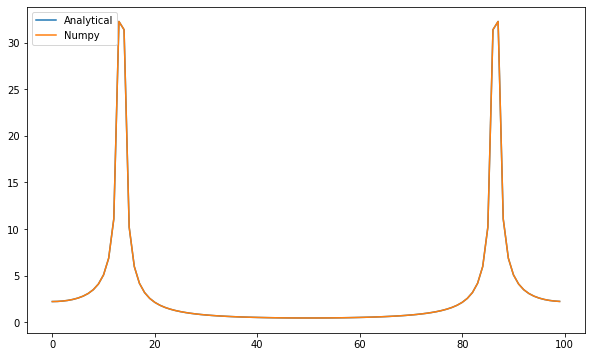

In [18]:
#plotting for an non-integer value of k'
dft_nonint = Sin(100, 13.5)

plt.figure(figsize=(10,6))
plt.plot(np.abs(dft_nonint[0]), label='Analytical')
plt.plot(np.abs(dft_nonint[1]), label='Numpy')
plt.legend()

We can see that there is spectral leakage when the value of k' is not an interger. The numpy DFT and our analytical DFT look extremly similar. Let's look at the errors:

In [19]:
#Getting error between the two:
err = np.mean(np.abs(dft_nonint[0] - dft_nonint[1]))
print(f"The error is {err}, which is similar to the computer's accuracy.")

The error is 9.273801656609473e-14, which is similar to the computer's accuracy.


### d)

In [20]:
N = 100
k_p = 13.5
n = np.arange(N)

window = 0.5*(1 - np.cos(2*np.pi*n/N))
sin = np.sin(2*np.pi*k_p*n/N)

new_sin = window*sin
new_dft = np.fft.fft(new_sin)

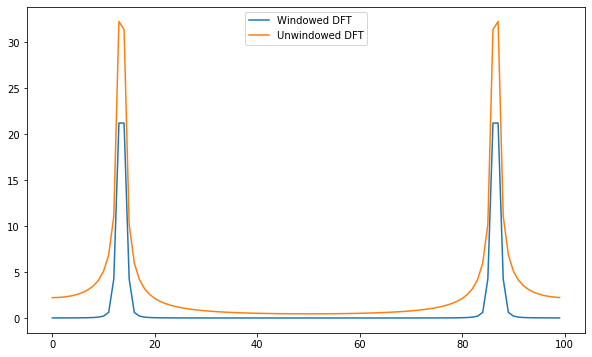

In [21]:
plt.figure(figsize=(10,6))

plt.plot(np.abs(new_dft), label='Windowed DFT')
plt.plot(np.abs(dft_nonint[1]), label='Unwindowed DFT')
plt.legend()

It looks like there is no more leakage! However the amplitude decreased.

### e)

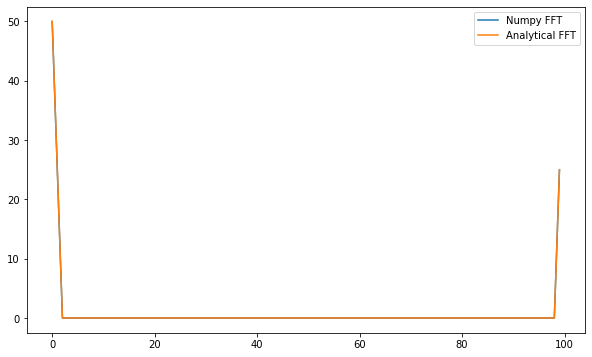

In [22]:
#Plotting the FFT of the window:
plt.figure(figsize=(10,6))
plt.plot(np.abs(np.fft.fft(window)), label='Numpy FFT')

#Plotting the Fourier transform of the window from [N/2, N/4, 0, ...,N/4]
window_an = np.zeros(N)
window_an[0] = N/2
window_an[1] = N/4
window_an[-1] = N/4

plt.plot(window_an, label='Analytical FFT')
plt.legend()

The two overlap perfectly! Note that this plots the absolute value of the FFT. If we were to plot the real part of the FFT, the Fourier (both the numpy and the analytical one) would actually follow [N/2, -N/4, 0,... -N/4]

Now this means that we can convolve the orginal DFT of the sin function with the DFT of the window. The latter is such that the only non-zero points, for each $k_i$, are $k_i, k_{i-1}, k_{i+1}$.

In [23]:
dft_nonint = Sin(100, 13.5)
new_window = np.zeros(N, dtype=complex)

for i in range(N-1):
    new_window[i] = 1/2*dft_nonint[0][i] - 1/4*dft_nonint[0][(i-1)] - 1/4*dft_nonint[0][(i+1)]

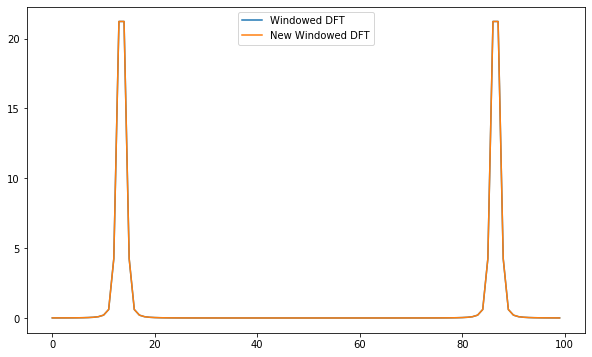

In [24]:
plt.figure(figsize=(10,6))

plt.plot(np.abs(new_dft), label='Windowed DFT')
plt.plot(np.abs(new_window), label='New Windowed DFT')
plt.legend()

Once again, the two overlap perfectly!